In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
from scipy import stats
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objects as go

In [4]:
bikes_df = pd.read_csv("/content/bike_buyers.csv")
bikes_df

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,23731,Married,Male,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,Male,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
997,11809,Married,NaN,60000.0,2.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,North America,38.0,Yes
998,19664,Single,Male,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [5]:
bikes_df.shape

(1000, 13)

In [6]:
#Setting the Columns
bikes_df.columns= ['ID','MaritalStatus','Gender','Income','Children','Education','Occupation','HomeOwner','Cars','CommuteDistance','Region','Age','Purchased Bike']

In [7]:
print(bikes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1000 non-null   int64  
 1   MaritalStatus    993 non-null    object 
 2   Gender           989 non-null    object 
 3   Income           994 non-null    float64
 4   Children         992 non-null    float64
 5   Education        1000 non-null   object 
 6   Occupation       1000 non-null   object 
 7   HomeOwner        996 non-null    object 
 8   Cars             991 non-null    float64
 9   CommuteDistance  1000 non-null   object 
 10  Region           1000 non-null   object 
 11  Age              992 non-null    float64
 12  Purchased Bike   1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB
None


In [8]:
print(bikes_df.head())

      ID MaritalStatus  Gender   Income  Children        Education  \
0  12496       Married  Female  40000.0       1.0        Bachelors   
1  24107       Married    Male  30000.0       3.0  Partial College   
2  14177       Married    Male  80000.0       5.0  Partial College   
3  24381        Single     NaN  70000.0       0.0        Bachelors   
4  25597        Single    Male  30000.0       0.0        Bachelors   

       Occupation HomeOwner  Cars CommuteDistance   Region   Age  \
0  Skilled Manual       Yes   0.0       0-1 Miles   Europe  42.0   
1        Clerical       Yes   1.0       0-1 Miles   Europe  43.0   
2    Professional        No   2.0       2-5 Miles   Europe  60.0   
3    Professional       Yes   1.0      5-10 Miles  Pacific  41.0   
4        Clerical        No   0.0       0-1 Miles   Europe  36.0   

  Purchased Bike  
0             No  
1             No  
2             No  
3            Yes  
4            Yes  


In [9]:
print(bikes_df.tail())

        ID MaritalStatus Gender    Income  Children        Education  \
995  23731       Married   Male   60000.0       2.0      High School   
996  28672        Single   Male   70000.0       4.0  Graduate Degree   
997  11809       Married    NaN   60000.0       2.0        Bachelors   
998  19664        Single   Male  100000.0       3.0        Bachelors   
999  12121        Single   Male   60000.0       3.0      High School   

         Occupation HomeOwner  Cars CommuteDistance         Region   Age  \
995    Professional       Yes   2.0       2-5 Miles  North America  54.0   
996    Professional       Yes   0.0       2-5 Miles  North America  35.0   
997  Skilled Manual       Yes   0.0       0-1 Miles  North America  38.0   
998      Management        No   3.0       1-2 Miles  North America  38.0   
999    Professional       Yes   2.0       10+ Miles  North America  53.0   

    Purchased Bike  
995            Yes  
996            Yes  
997            Yes  
998             No  
999  

In [10]:
print(bikes_df['Purchased Bike'].value_counts())

No     519
Yes    481
Name: Purchased Bike, dtype: int64


In [11]:
print(bikes_df['Income'].value_counts())

60000.0     165
40000.0     153
30000.0     134
70000.0     123
80000.0      90
20000.0      74
10000.0      73
50000.0      40
90000.0      38
130000.0     32
100000.0     29
120000.0     17
110000.0     16
150000.0      4
160000.0      3
170000.0      3
Name: Income, dtype: int64


In [12]:
# Checking percentage of missing values
m = (100-(bikes_df.count()/bikes_df.isna().count())*100)
display(m)

ID                 0.0
MaritalStatus      0.7
Gender             1.1
Income             0.6
Children           0.8
Education          0.0
Occupation         0.0
HomeOwner          0.4
Cars               0.9
CommuteDistance    0.0
Region             0.0
Age                0.8
Purchased Bike     0.0
dtype: float64

In [13]:
bikes_df.drop(bikes_df[pd.isnull(bikes_df['Gender'])].index, inplace = True)

In [14]:
bikes_df.drop("Gender",axis=1, inplace=True)

In [15]:
bikes_df

,ID,MaritalStatus,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Region,Age,Purchased Bike
0,12496,Married,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
4,25597,Single,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes
5,13507,Married,10000.0,2.0,Partial College,Manual,Yes,0.0,1-2 Miles,Europe,50.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
994,13466,Married,80000.0,5.0,Partial College,Professional,Yes,3.0,1-2 Miles,North America,46.0,No
995,23731,Married,60000.0,2.0,High School,Professional,Yes,2.0,2-5 Miles,North America,54.0,Yes
996,28672,Single,70000.0,4.0,Graduate Degree,Professional,Yes,0.0,2-5 Miles,North America,35.0,Yes
998,19664,Single,100000.0,3.0,Bachelors,Management,No,3.0,1-2 Miles,North America,38.0,No


In [16]:
bikes_df.isnull().sum()

ID                 0
MaritalStatus      7
Income             6
Children           7
Education          0
Occupation         0
HomeOwner          4
Cars               9
CommuteDistance    0
Region             0
Age                7
Purchased Bike     0
dtype: int64

In [17]:
#Identifying duplicate values
bikes_df.duplicated().sum()

0

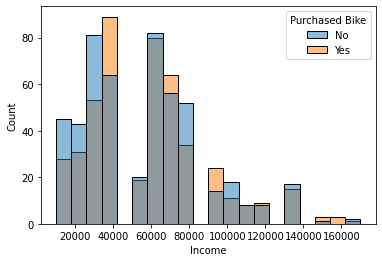

In [18]:
sns.histplot(data = bikes_df, x="Income", hue="Purchased Bike")

In [19]:
bikes_df.groupby(['Region']).count()

,ID,MaritalStatus,Income,Children,Education,Occupation,HomeOwner,Cars,CommuteDistance,Age,Purchased Bike
Region,,,,,,,,,,,
Europe,300,298,297,298,300,300,299,295,300,297,300
North America,500,500,499,496,500,500,498,496,500,497,500
Pacific,189,184,187,188,189,189,188,189,189,188,189


In [20]:
bikes_df['Region'].unique()

array(['Europe', 'Pacific', 'North America'], dtype=object)

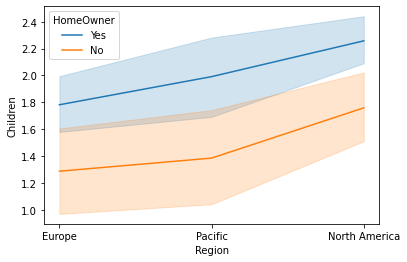

In [21]:
sns.lineplot(data = bikes_df, y = 'Children', x = 'Region',hue = 'HomeOwner')

In [22]:
# Pursuing Education ratio  
bikes_df.Education.value_counts().sort_values(ascending=False)

Bachelors              301
Partial College        261
High School            179
Graduate Degree        172
Partial High School     76
Name: Education, dtype: int64

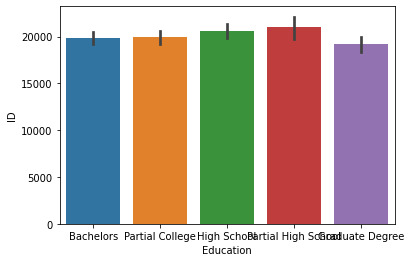

In [23]:
sns.barplot(x = 'Education', y = 'ID', data =bikes_df)


In [24]:
bikes_df.Occupation.value_counts().sort_values(ascending=False)

Professional      271
Skilled Manual    251
Clerical          177
Management        171
Manual            119
Name: Occupation, dtype: int64

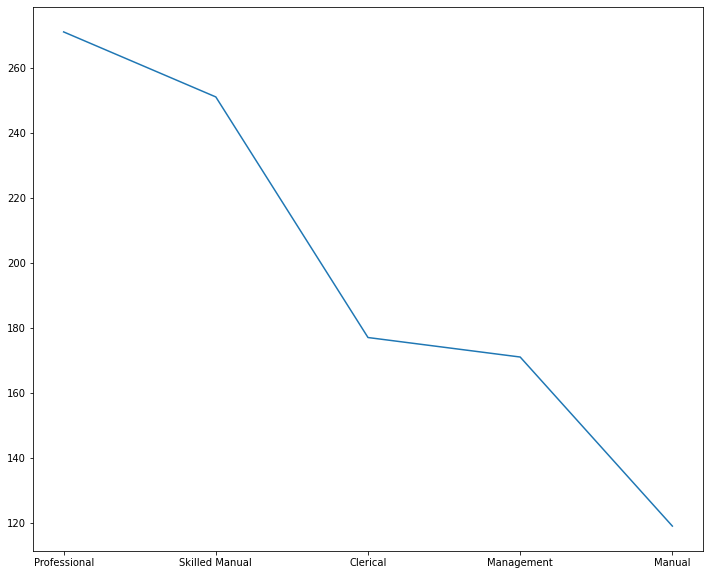

In [25]:
plt.figure(figsize=(12,10))
plt.plot(bikes_df.Occupation.value_counts().head())
plt.xticks(rotation=360)
plt.show()

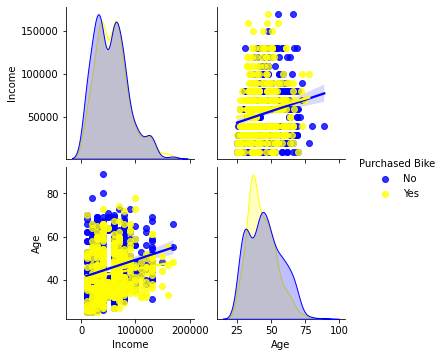

In [26]:
sns.pairplot(bikes_df, vars=["Income", "Age"], hue="Purchased Bike", kind="reg", palette=sns.blend_palette(['blue', 'yellow'], 2))

In [27]:
label10=np.arange(0,10)
top=bikes_df["CommuteDistance"].value_counts()
fig=go.Figure(data=[go.Bar(y=top.values,x=top.index, marker={'color':label10})])
fig.update_layout(autosize=True,plot_bgcolor='rgb(275,275,275)')
fig.data[0].marker.line.width=3
fig.data[0].marker.line.color="black"
fig